## 1. Aplicaciones y reseñas de Google Play Store

Las aplicaciones móviles están en todas partes. Son fáciles de crear y pueden ser lucrativas. Debido a estos dos factores, cada vez se desarrollan más aplicaciones. En este cuaderno, haremos un análisis exhaustivo del mercado de aplicaciones de Android comparando más de diez mil aplicaciones en Google Play en diferentes categorías. Buscaremos ideas en los datos para idear estrategias que impulsen el crecimiento y la retención.

Echemos un vistazo a los datos, que constan de dos archivos

apps.csv: contiene todos los detalles de las aplicaciones en Google Play. Hay 13 características que describen una app determinada.
user_reviews.csv: contiene 100 reseñas para cada app, las más útiles primero. El texto de cada reseña ha sido preprocesado y atribuido con tres nuevas características: Sentimiento (Positivo, Negativo o Neutral), Polaridad del Sentimiento y Subjetividad del Sentimiento.



In [11]:
import pandas as pd
apps_with_duplicates = pd.read_csv('datasets/apps.csv')
apps= apps_with_duplicates

#Imprimir el numero total de aplicaciones
print ("Total de aplicaciones en el dataset = " , apps['App'].count())
# Tambien se puede obtener el total de aplicaciones con len
print ("Total de aplicaciones en el dataset = " , len(apps['App']))

# Imprime un resumen conciso del marco de datos de las aplicaciones
print (apps.info())






Total de aplicaciones en el dataset =  9659
Total de aplicaciones en el dataset =  9659
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB
None


In [12]:
# Obtener una mirada aleatoria de n filas
apps.sample(n=5)

,Unnamed: 0,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1827,2325,Ovia Parenting & Baby Development Tracker,MEDICAL,4.7,6185,38.0,"100,000+",Free,0,Everyone,Medical,"August 3, 2018",1.2.0,4.3 and up
9651,10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.6,"1,000+",Free,0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
7212,8290,WEB.DE Mail,COMMUNICATION,4.3,226541,NaN,"10,000,000+",Free,0,Everyone,Communication,"July 25, 2018",Varies with device,Varies with device
7473,8568,DM TrackMan,MAPS_AND_NAVIGATION,NaN,10,7.8,100+,Free,0,Everyone,Maps & Navigation,"June 26, 2018",2.1.0,4.4 and up
9265,10437,Real Airplane Flight Simulator: Pilot Games,FAMILY,3.3,21735,37.0,"1,000,000+",Free,0,Everyone,Simulation,"July 11, 2018",1.0.03,4.0 and up


In [13]:
# Informacion de las variables de cada columna
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


## 2. Data Cleaning
Las cuatro características con las que trabajaremos más frecuentemente en adelante son Instalaciones, Tamaño, Valoración y Precio. La función info() (de la tarea anterior) nos indicó que las columnas Instalaciones y Precio son de tipo objeto y no int64 o float64 como cabría esperar. Esto se debe a que la columna contiene algunos caracteres más que los dígitos [0,9]. Lo ideal sería que estas columnas fueran numéricas, como su nombre indica.
Por lo tanto, ahora procedemos a la limpieza de los datos y los preparamos para ser consumidos en nuestro análisis más tarde. En concreto, la presencia de caracteres especiales (, $ +) en las columnas Instalaciones y Precio dificulta su conversión a un tipo de datos numérico.

In [14]:
#Limpiar datos, precio e instalaciones aparecen como objetos. Estos datos se deben limpiar para transformarlos
#en un float y trabajarlo como un numero

signos_to_remove=['+', ',', '$']
Col_remplazar = ['Installs', 'Price']
for col in Col_remplazar:
    #Reemplazar cada caracter con un string vacio
     
    for chart in signos_to_remove:
        apps[col] = apps[col].apply(lambda x: x.replace(chart, ''))
        
    apps[col]=pd.to_numeric(apps[col])

In [15]:
#Corroborar cambio
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   int64  
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   float64
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.0+ MB


## 3. Explorar las categorías de aplicaciones
Con más de mil millones de usuarios activos en 190 países de todo el mundo, Google Play sigue siendo una importante plataforma de distribución para construir una audiencia global. Para que las empresas consigan que sus aplicaciones lleguen a los usuarios, es importante hacerlas más rápidas y fáciles de descubrir en Google Play. Para mejorar la experiencia general de búsqueda, Google ha introducido el concepto de agrupación de aplicaciones en categorías.

Esto nos lleva a las siguientes preguntas:

¿Qué categoría tiene la mayor cuota de aplicaciones (activas) en el mercado?
¿Hay alguna categoría específica que domine el mercado?
¿Qué categorías tienen el menor número de aplicaciones?
Veremos que hay 33 categorías únicas de aplicaciones presentes en nuestro conjunto de datos. Las aplicaciones familiares y de juegos tienen la mayor prevalencia en el mercado. Curiosamente, las aplicaciones de herramientas, negocios y medicina también están en la cima.

La cantidad de categorías únicas son:  33
FAMILY                 1832
GAME                    959
TOOLS                   827
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           74
ART_AND_DESIGN           64
EVENTS                   64
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64


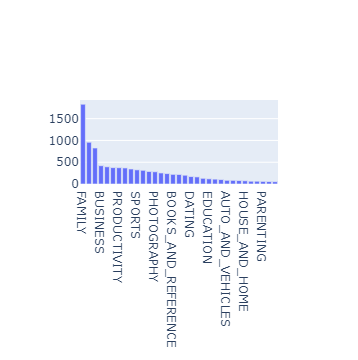

In [16]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go

#Contar las categorias del archivo
Category_count= len(apps['Category'].unique())
print ('La cantidad de categorías únicas son: ', Category_count)

#Contar el numero de aplicaciones en cada "Category" y ordenarlas en orden descendente
num_apps_in_category= apps["Category"].value_counts()
print (num_apps_in_category)

data = [go.Bar(
        x = num_apps_in_category.index,
        y = num_apps_in_category.values,
)]

plotly.offline.iplot(data)

## 5. Distribución de las valoraciones de las aplicaciones
Después de haber visto la cuota de mercado de cada categoría de aplicaciones, veamos cómo se comportan todas estas aplicaciones en promedio. Las valoraciones de las aplicaciones (en una escala de 1 a 5) influyen en la capacidad de descubrimiento, la conversión de las aplicaciones y la imagen de marca de la empresa. Las valoraciones son un indicador clave del rendimiento de una aplicación.

Según nuestra investigación, el volumen medio de valoraciones en todas las categorías de aplicaciones es de 4,17. El diagrama del histograma está sesgado hacia la izquierda, lo que indica que la mayoría de las aplicaciones están muy bien valoradas, con sólo unas pocas excepciones en las aplicaciones poco valoradas.

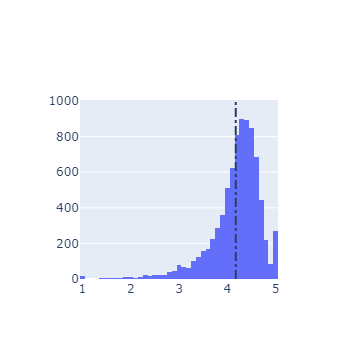

In [17]:
# Promedio rating de aplicaciones
avg_app_rating = apps['Rating'].mean()

#Distribucion de la aplicaciones de acuerdo a su rating
data = [go.Histogram(x = apps ['Rating']
)]

# Vertical dashed line to indicate the average app rating
layout = {'shapes': [{
              'type' :'line',
              'x0': avg_app_rating,
              'y0': 0,
              'x1': avg_app_rating,
              'y1': 1000,
              'line': { 'dash': 'dashdot'}
          }]
          }

plotly.offline.iplot({'data': data, 'layout': layout})
 

## 6. Tamaño y precio de una aplicación
Examinemos ahora el tamaño y el precio de la aplicación. En cuanto al tamaño, si la aplicación móvil es demasiado grande, puede resultar difícil y/o costosa de descargar para los usuarios. Los largos tiempos de descarga podrían desanimar a los usuarios incluso antes de que experimenten su aplicación móvil. Además, el dispositivo de cada usuario tiene una cantidad limitada de espacio en disco. En cuanto al precio, algunos usuarios esperan que sus aplicaciones sean gratuitas o baratas. Estos problemas se agravan si el mundo en desarrollo forma parte de su mercado objetivo, especialmente debido a las velocidades de Internet, el poder adquisitivo y los tipos de cambio.

¿Cómo podemos elaborar estrategias eficaces para dimensionar y fijar el precio de nuestra aplicación?

¿Afecta el tamaño de una aplicación a su valoración?
¿Los usuarios realmente se preocupan por las aplicaciones con un sistema pesado o prefieren las aplicaciones ligeras?
¿Afecta el precio de una aplicación a su valoración?
¿Los usuarios prefieren siempre las aplicaciones gratuitas a las de pago?
Hemos comprobado que la mayoría de las aplicaciones mejor valoradas (con una puntuación superior a 4) tienen entre 2 y 20 MB. También encontramos que la gran mayoría de las aplicaciones tienen un precio inferior a 10 dólares.

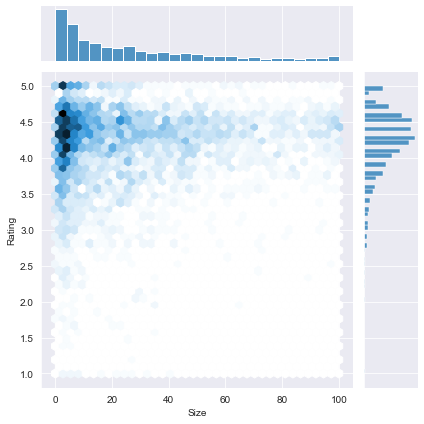

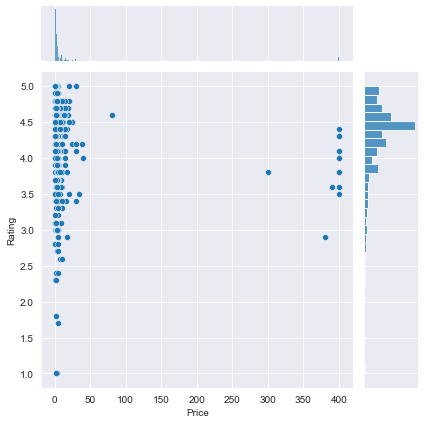

In [18]:
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")


# Select rows where both 'Rating' and 'Size' values are present (ie. the two values are not null)
apps_with_size_and_rating_present = apps[(~apps['Rating'].isnull()) & (~apps['Size'].isnull())]

# Subset for categories with at least 250 apps
large_categories = apps_with_size_and_rating_present.groupby('Category').filter(lambda x: len(x) >= 250)

# Plot size vs. rating
plt1 = sns.jointplot(x = large_categories['Size'], y = large_categories['Rating'], kind = 'hex')

# Select apps whose 'Type' is 'Paid'
paid_apps = apps_with_size_and_rating_present[apps_with_size_and_rating_present['Type'] == 'Paid']

# Plot price vs. rating
plt2 = sns.jointplot(x = paid_apps['Price'], y = paid_apps['Rating'])

## 7. Relación entre la categoría de la aplicación y su precio
Así que ahora viene la parte difícil. ¿Cómo pueden las empresas y los desarrolladores llegar a fin de mes? ¿Qué estrategias de monetización pueden utilizar las empresas para maximizar los beneficios? Los costes de las aplicaciones se basan en gran medida en las características, la complejidad y la plataforma.

Hay muchos factores que hay que tener en cuenta a la hora de seleccionar la estrategia de precios adecuada para su aplicación móvil. Es importante tener en cuenta la disposición de su cliente a pagar por su aplicación. Un precio incorrecto podría romper el trato antes de que se produzca la descarga. Los clientes potenciales podrían desistir por lo que perciben como un coste escandaloso, o podrían eliminar una aplicación que han descargado después de recibir demasiados anuncios o simplemente no obtener el valor de su dinero.

Las diferentes categorías exigen diferentes rangos de precios. Algunas aplicaciones sencillas y de uso diario, como la de la calculadora, deberían ser gratuitas. Sin embargo, tendría sentido cobrar por una app médica altamente especializada que diagnostica a los pacientes diabéticos. A continuación, vemos que las aplicaciones médicas y familiares son las más caras. Algunas aplicaciones médicas alcanzan incluso los 80 dólares. Todas las aplicaciones de juegos tienen un precio razonable por debajo de los 20 dólares.

,Category,App,Price,Rating
3327,FAMILY,most expensive app (H),399.99,4.3
3465,LIFESTYLE,💎 I'm rich,399.99,3.8
3469,LIFESTYLE,I'm Rich - Trump Edition,400.00,3.6
4396,LIFESTYLE,I am rich,399.99,3.8
4398,FAMILY,I am Rich Plus,399.99,4.0
4399,LIFESTYLE,I am rich VIP,299.99,3.8
4400,FINANCE,I Am Rich Premium,399.99,4.1
4401,LIFESTYLE,I am extremely Rich,379.99,2.9
4402,FINANCE,I am Rich!,399.99,3.8
4403,FINANCE,I am rich(premium),399.99,3.5


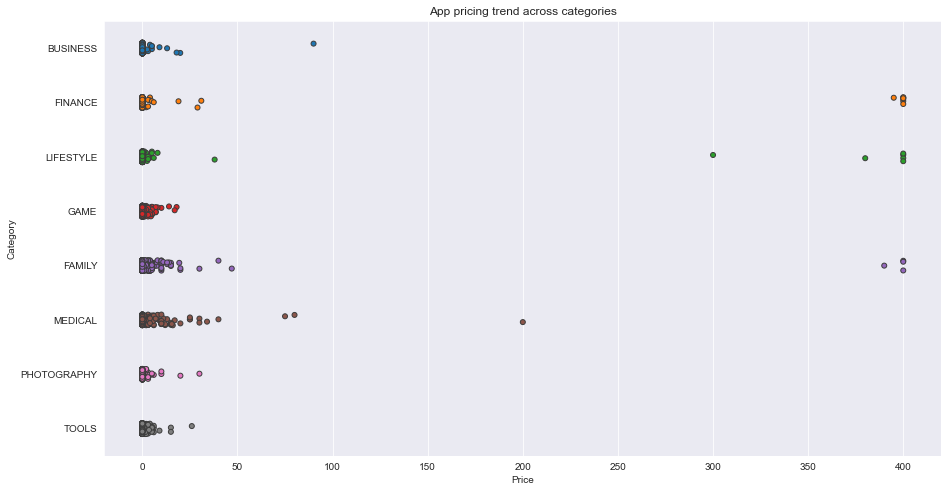

In [24]:
import matplotlib.pyplot as plt
fig, ax= plt.subplots()
fig.set_size_inches(15, 8)

#Seleccionar unas pocas categorias de aplicaciones populares
popular_app_cats= apps[apps.Category.isin(['GAME', 'FAMILY', 'PHOTOGRAPHY',
                                            'MEDICAL', 'TOOLS', 'FINANCE',
                                            'LIFESTYLE','BUSINESS'])]

#Seleccionar la tendencia del precio, graficando price vs categoria
ax = sns.stripplot(x = popular_app_cats['Price'], y = popular_app_cats['Category'], jitter=True, linewidth=1)
ax.set_title('App pricing trend across categories')

# Aplicaciones con un precio mayor a 200
apps_above_200 = apps[apps['Price']>200]
apps_above_200[['Category', 'App', 'Price','Rating']]


## 8. Filtrar las aplicaciones "basura
Parece que muchas de las aplicaciones realmente caras son aplicaciones "basura". Es decir, aplicaciones que no tienen realmente un propósito. Algún desarrollador de aplicaciones puede crear una aplicación llamada I Am Rich Premium o la aplicación más cara (H) sólo como una broma o para probar sus habilidades de desarrollo de aplicaciones. Algunos desarrolladores incluso hacen esto con intención maliciosa y tratan de ganar dinero esperando que la gente haga clic accidentalmente en la compra de su aplicación en la tienda.

Filtremos estas aplicaciones basura y rehagamos nuestra visualización.



Text(0.5, 1.0, 'App pricing trend across categories after filtering for junk apps')

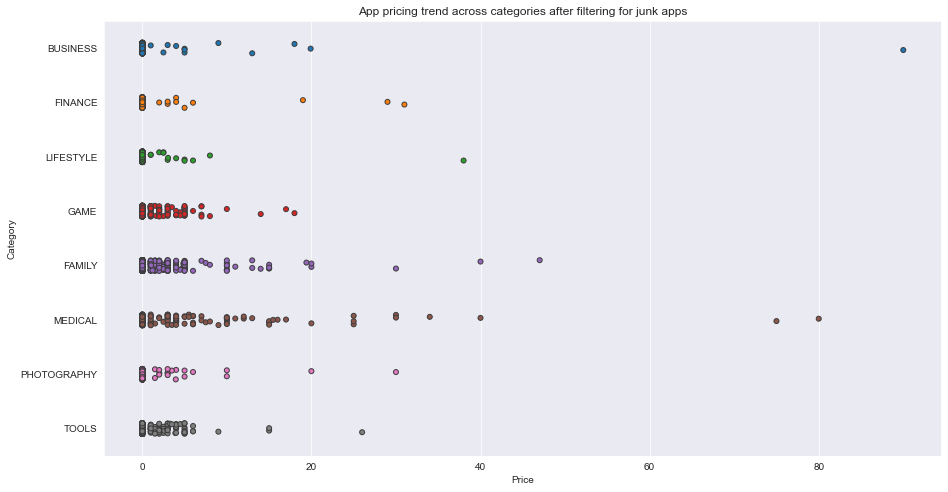

In [25]:
# Seleccion de aplicaciones bajo los $100

apps_under_100 = popular_app_cats[apps['Price']<100]

fig, ax = plt.subplots()
fig.set_size_inches(15, 8)

# Examine price vs category with the authentic apps (apps_under_100)
ax = sns.stripplot(x ='Price' , y = 'Category', data = apps_under_100, jitter = True, linewidth = 1)
ax.set_title('App pricing trend across categories after filtering for junk apps')



## 9. Popularidad de las aplicaciones de pago frente a las gratuitas
Para las aplicaciones en la Play Store hoy en día, hay cinco tipos de estrategias de precios: gratis, freemium, de pago, paymium y de suscripción. Vamos a centrarnos sólo en las apps gratuitas y de pago. Algunas características de las aplicaciones gratuitas son

Son de descarga gratuita.
La principal fuente de ingresos suele ser la publicidad.
Suelen ser creadas por empresas que tienen otros productos y la app sirve como extensión de esos productos.
Puede servir como herramienta de retención de clientes, comunicación y servicio al cliente.
Algunas características de las aplicaciones de pago son:

Se pide a los usuarios que paguen una vez por la app para descargarla y utilizarla.
El usuario no puede hacerse una idea de la aplicación antes de comprarla.
¿Se instalan las aplicaciones de pago tanto como las gratuitas? Resulta que las aplicaciones de pago tienen un número relativamente menor de instalaciones que las gratuitas, aunque la diferencia no es tan marcada como habría esperado.



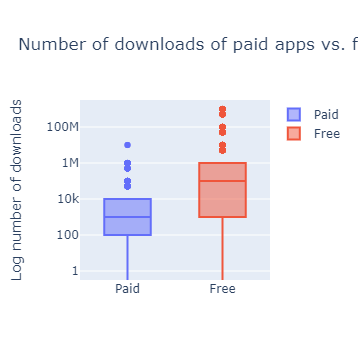

In [26]:
trace0 = go.Box(
    # Data for paid apps
    y = apps[apps['Type'] == 'Paid']['Installs'],
    name = 'Paid'
)

trace1 = go.Box(
    # Data for free apps
    y = apps[apps['Type'] == 'Free']['Installs'],
    name = 'Free'
)

layout = go.Layout(
    title = "Number of downloads of paid apps vs. free apps",
    yaxis = dict(title = "Log number of downloads",
                type = 'log',
                autorange = True)
)

# Add trace0 and trace1 to a list for plotting
data = [trace0, trace1]
plotly.offline.iplot({'data': data, 'layout': layout})

## 10. Análisis del sentimiento de las reseñas de los usuarios
<p>El análisis de los datos de las reseñas de los usuarios para determinar cómo se siente la gente con respecto a su producto, marca o servicio puede realizarse mediante una técnica llamada análisis de sentimientos. Las reseñas de usuarios de aplicaciones pueden ser analizadas para identificar si el estado de ánimo es positivo, negativo o neutro sobre esa aplicación. Por ejemplo, las palabras positivas en una reseña de una aplicación pueden incluir palabras como "increíble", "amigable", "bueno", "genial" y "amor". Las palabras negativas podrían ser palabras como 'malware', 'odio', 'problema', 'reembolso' e 'incompetente'.</p> <p>
<p>Al trazar las puntuaciones de polaridad de las opiniones de los usuarios de las aplicaciones de pago y gratuitas, observamos que las aplicaciones gratuitas reciben muchos comentarios duros, como indican los valores atípicos en el eje negativo. Los comentarios de las aplicaciones de pago no parecen ser nunca extremadamente negativos. Esto puede indicar algo sobre la calidad de la aplicación, es decir, que las aplicaciones de pago son de mayor calidad que las gratuitas por término medio. La puntuación mediana de la polaridad de las aplicaciones de pago es un poco más alta que la de las gratuitas, lo que coincide con nuestra observación anterior.</p> <p>
<p>En este cuaderno hemos analizado más de diez mil aplicaciones de Google Play Store. Podemos utilizar nuestros hallazgos para informar nuestras decisiones si alguna vez deseamos crear una aplicación nosotros mismos.</p> <p>

Traducción realizada con la versión gratuita del 

Text(0.5, 1.0, 'Sentiment Polarity Distribution')

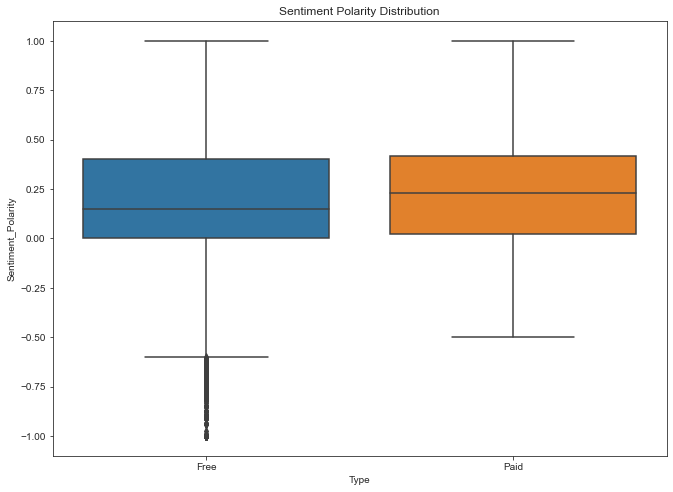

In [29]:
# Load user_reviews.csv
reviews_df = pd.read_csv('datasets/user_reviews.csv')

# Join the two dataframes
merged_df = pd.merge(apps, reviews_df, on = "App")

# Drop NA values from Sentiment and Review columns
merged_df = merged_df.dropna(subset = ['Sentiment', 'Review'])

sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11, 8)

# User review sentiment polarity for paid vs. free apps
ax = sns.boxplot(x = 'Type', y = 'Sentiment_Polarity', data = merged_df)
ax.set_title('Sentiment Polarity Distribution')